# <font color=green> Graded Assignment for Hypothesis Testing

## Import Necessary Tools

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import missingno as msno
from scipy.stats import binom

## Import CSV data

In [5]:
df = pd.read_csv(r"property.csv")

In [6]:
# For showing top 5 rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
# A short information of the dataset
df.info()

## Checking duplicate value in the dataset
print("\n Checking Duplicated value :\n\n", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Checking for null/empty value in dataset

In [9]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

- Yes! There are present some missing value.
- Present missing value in variables: ```Car```, ```BuildingArea```, ```YearBuilt``` and ```CouncilArea```.

In [11]:
## Checking size of the dataset
df.shape

(13580, 21)

## Handling missing value

In [13]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [14]:
# For some statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


<Axes: >

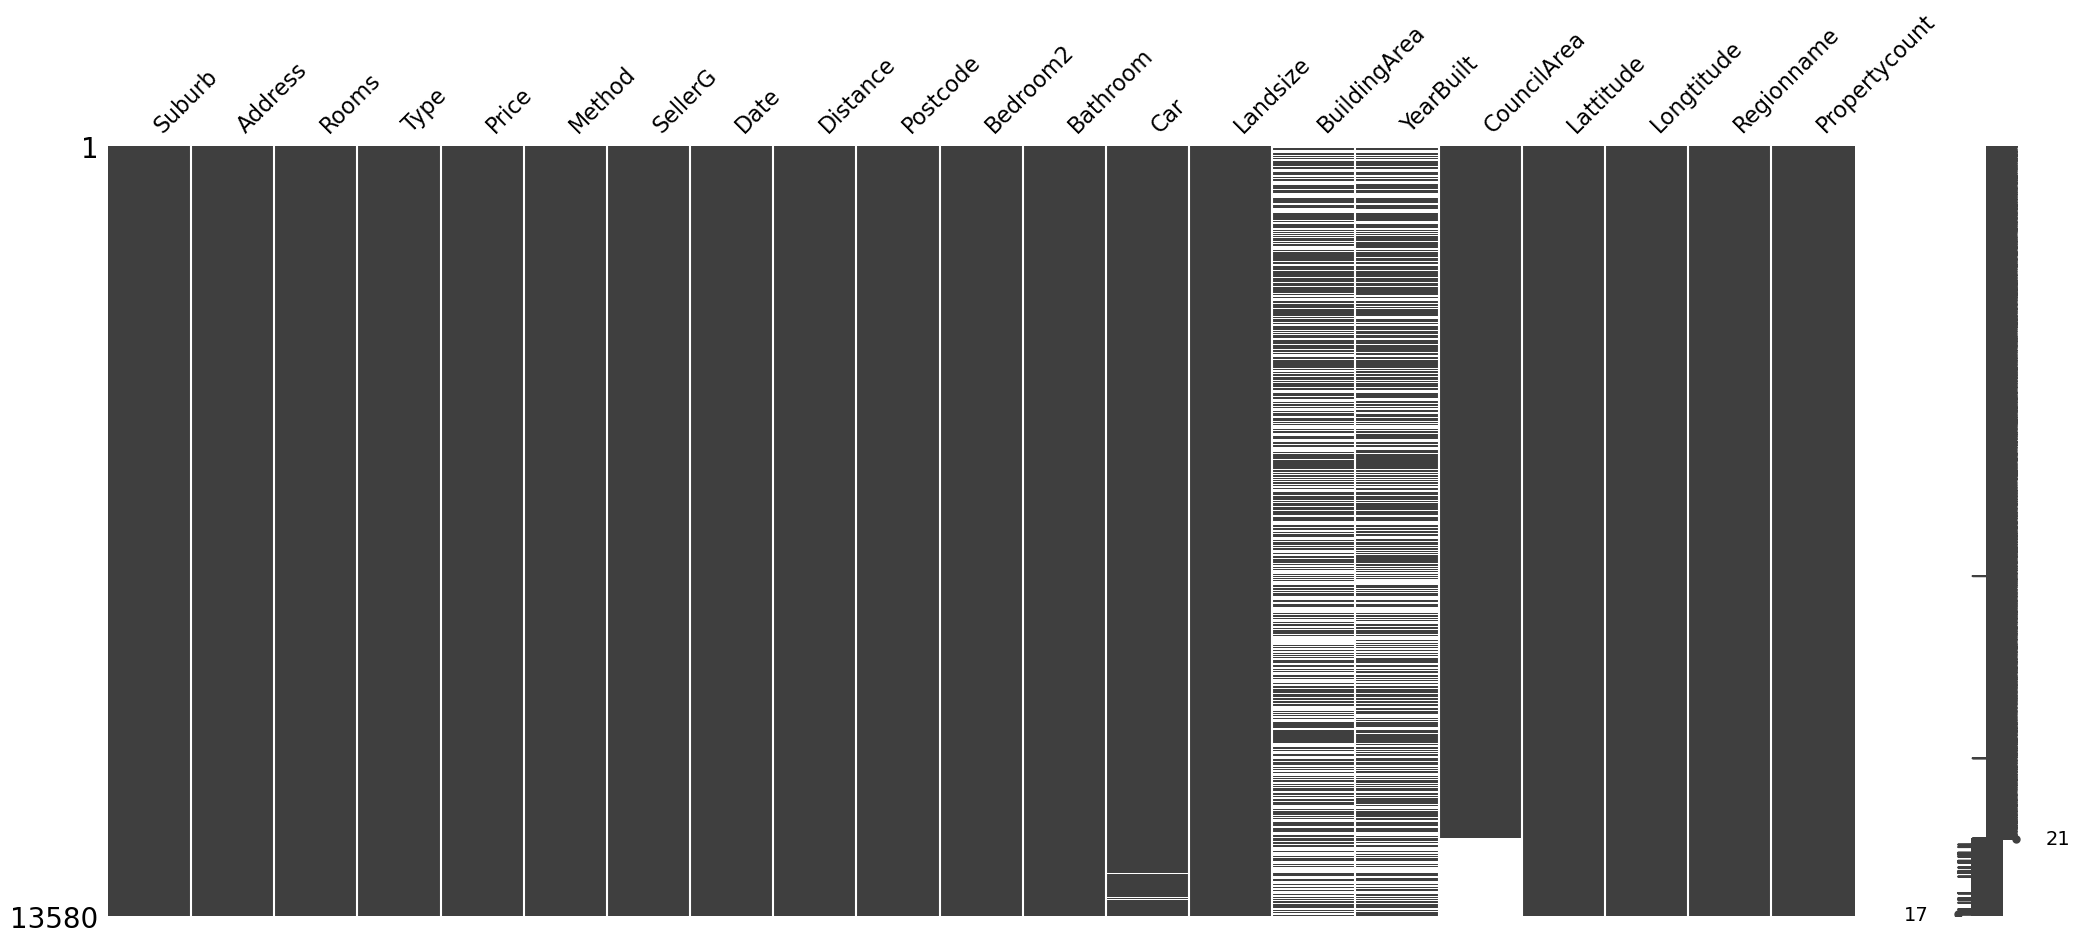

In [15]:
# Visualize the missing value witht the charts
msno.matrix(df)

<Axes: >

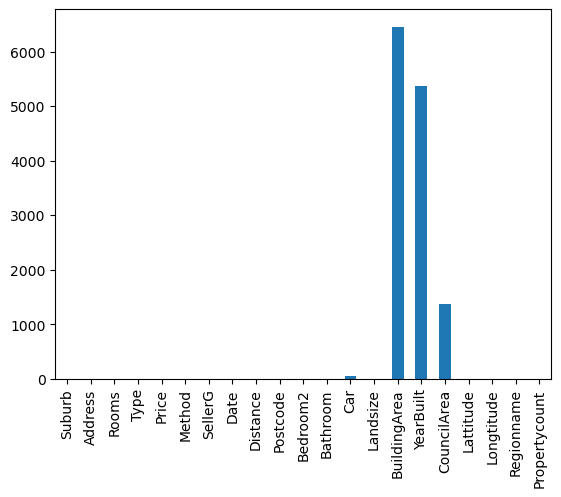

In [16]:
df.isna().sum().plot(kind='bar')

In [17]:
# Filling those missing values 
df = df.fillna(df["Car"].median())
df = df.fillna(df["BuildingArea"].median())
df['YearBuilt'] = df['YearBuilt'].interpolate(method='linear')
df = df.fillna(df["CouncilArea"].mode())

In [18]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<Axes: >

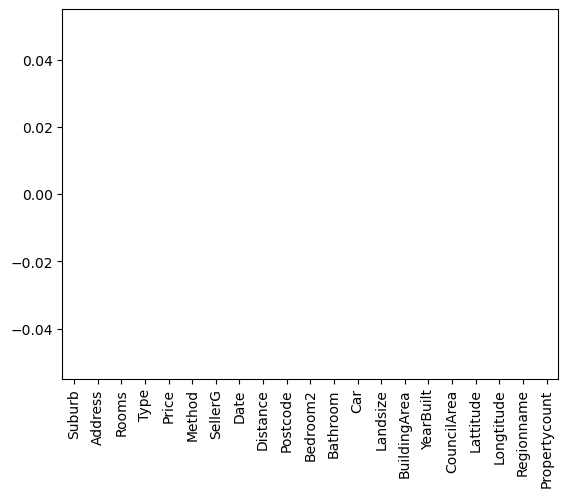

In [19]:
df.isna().sum().plot(kind='bar')

## Handling Outliers for Numerical variables

In [21]:
# all my columns
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
num_cols = []

# All my Numerical columns
for i in df.columns:
    if df[i].dtype != 'object':
        num_cols.append(i)
        # Printing
        print(i)

Rooms
Price
Distance
Postcode
Bedroom2
Bathroom
Car
Landsize
BuildingArea
YearBuilt
Lattitude
Longtitude
Propertycount


In [23]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

<Axes: >

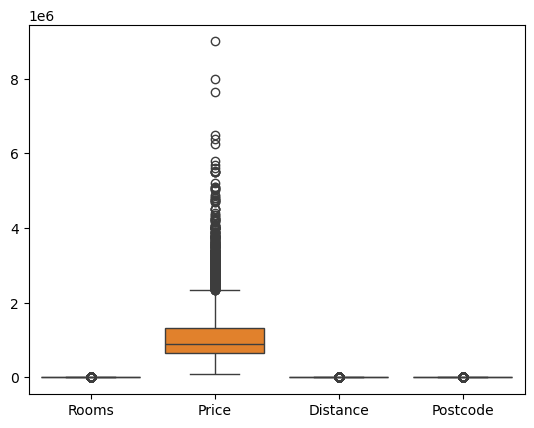

In [81]:
#Boxplot for 'Rooms','Price','Distance','Postcode' variables before handling the outliers-
sns.boxplot(data=df[['Rooms','Price','Distance','Postcode']])

Rooms            0.50
Price      -370000.00
Distance        -4.25
Postcode      2888.00
dtype: float64
Rooms             4.50
Price       2350000.00
Distance         23.35
Postcode       3304.00
dtype: float64

 After Handling the Outliers :




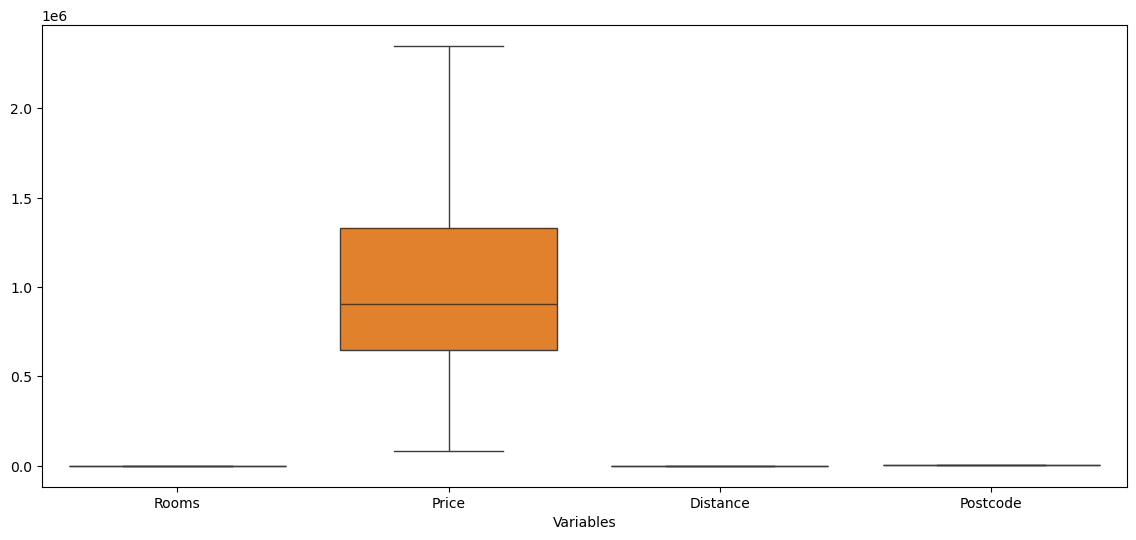

In [117]:
Q1=df[['Rooms','Price','Distance','Postcode']].quantile(0.25)
Q3=df[['Rooms','Price','Distance','Postcode']].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df[['Rooms','Price','Distance','Postcode']]=np.where(df[['Rooms','Price','Distance','Postcode']]>upper_bound,upper_bound,df[['Rooms','Price','Distance','Postcode']])
df[['Rooms','Price','Distance','Postcode']]=np.where(df[['Rooms','Price','Distance','Postcode']]<lower_bound,lower_bound,df[['Rooms','Price','Distance','Postcode']])

print("\n After Handling the Outliers :\n\n")
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['Rooms','Price','Distance','Postcode']])
plt.xlabel("Variables")
plt.show()

In [87]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

<Axes: >

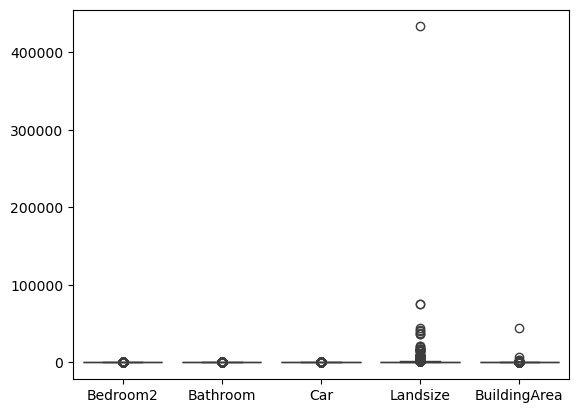

In [89]:
#Boxplot for 'Bedroom2','Bathroom','Car','Landsize', 'BuildingArea' variables before handling the outliers-
sns.boxplot(data=df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']])

Bedroom2          0.50
Bathroom         -0.50
Car              -0.50
Landsize       -534.00
BuildingArea   -189.91
dtype: float64
Bedroom2           4.50
Bathroom           3.50
Car                3.50
Landsize        1362.00
BuildingArea     321.85
dtype: float64

 After Handling the Outliers :




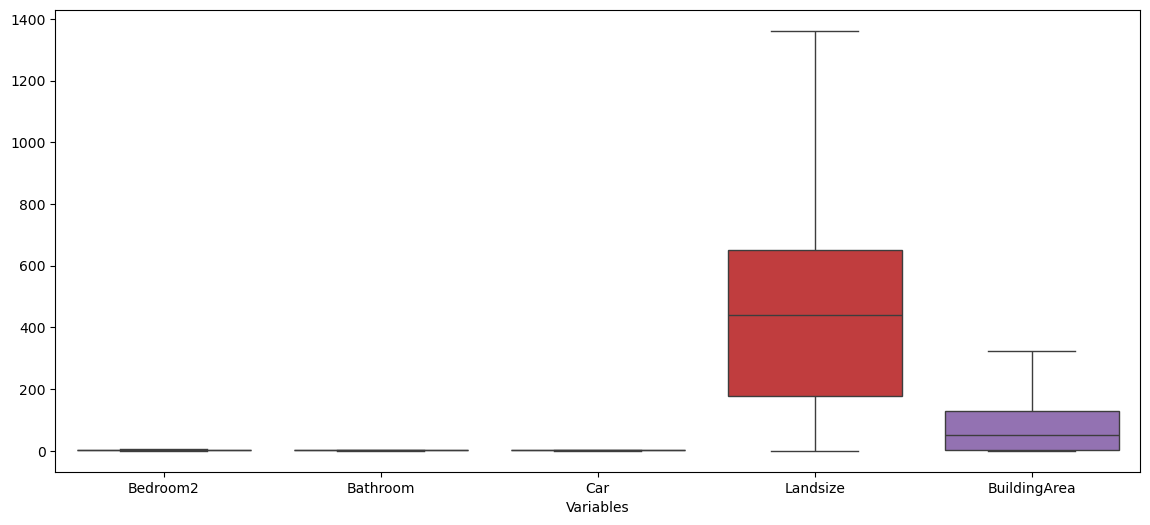

In [115]:
Q1=df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']].quantile(0.25)
Q3=df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']]=np.where(df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']]>upper_bound,upper_bound,df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']])
df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']]=np.where(df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']]<lower_bound,lower_bound,df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']])

print("\n After Handling the Outliers :\n\n")
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['Bedroom2','Bathroom','Car','Landsize', 'BuildingArea']])
plt.xlabel("Variables")
plt.show()

In [95]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

<Axes: >

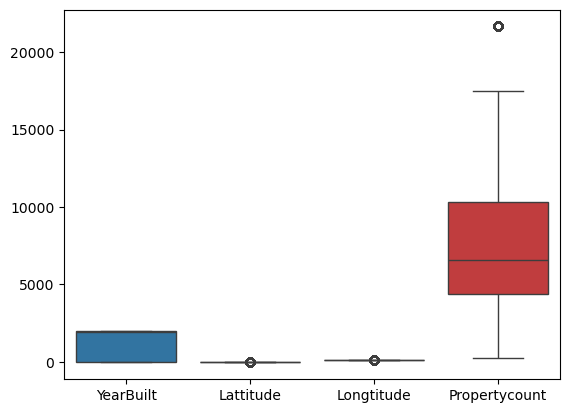

In [99]:
#Boxplot for 'Bedroom2','Bathroom','Car','Landsize', 'BuildingArea' variables before handling the outliers-
sns.boxplot(data=df[['YearBuilt','Lattitude','Longtitude','Propertycount']])

YearBuilt       -2957.500000
Lattitude         -38.007456
Longtitude        144.736542
Propertycount   -4546.500000
dtype: float64
YearBuilt         4934.500000
Lattitude          -37.605766
Longtitude         145.251363
Propertycount    19257.500000
dtype: float64

After Handling Outliers :



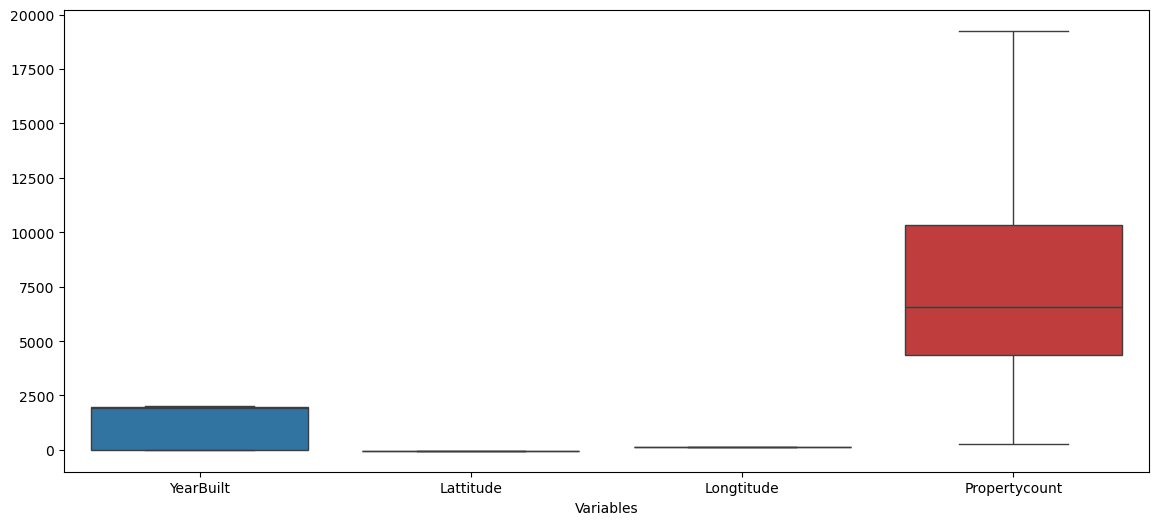

In [113]:
Q1=df[['YearBuilt','Lattitude','Longtitude','Propertycount']].quantile(0.25)
Q3=df[['YearBuilt','Lattitude','Longtitude','Propertycount']].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df[['YearBuilt','Lattitude','Longtitude','Propertycount']]=np.where(df[['YearBuilt','Lattitude','Longtitude','Propertycount']]>upper_bound,upper_bound,df[['YearBuilt','Lattitude','Longtitude','Propertycount']])
df[['YearBuilt','Lattitude','Longtitude','Propertycount']]=np.where(df[['YearBuilt','Lattitude','Longtitude','Propertycount']]<lower_bound,lower_bound,df[['YearBuilt','Lattitude','Longtitude','Propertycount']])

print("\nAfter Handling Outliers :\n")
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['YearBuilt','Lattitude','Longtitude','Propertycount']])
plt.xlabel("Variables")
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

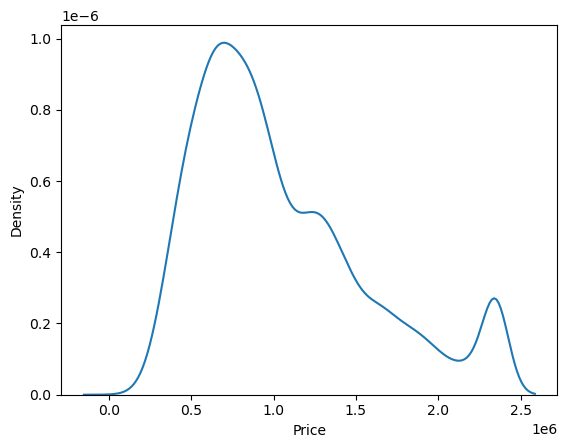

In [127]:
## Kde plot for checking the distribution of the data
sns.kdeplot(data=df['Price'])

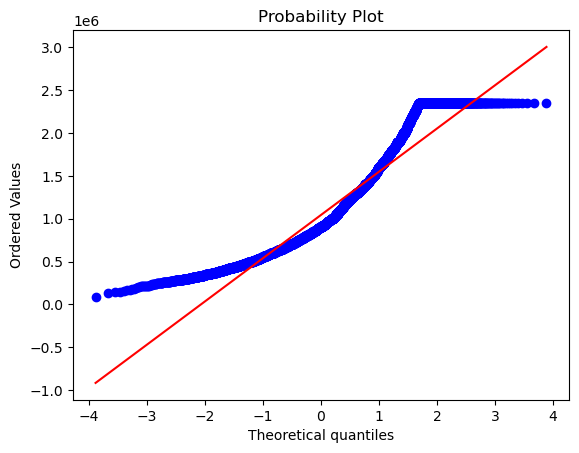

In [125]:
# Q.Q plot for checking the data's distributions is normal or not.
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.show()

## After doing EDA we have the final DataFrame

In [146]:
print("Final DataFrame :\n\n", df)
df.info()

Final DataFrame :

               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St    2.0    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St    2.0    h  1035000.0      S   
2         Abbotsford      5 Charles St    3.0    h  1465000.0     SP   
3         Abbotsford  40 Federation La    3.0    h   850000.0     PI   
4         Abbotsford       55a Park St    4.0    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr    4.0    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr    3.0    h  1031000.0     SP   
13577   Williamstown       83 Power St    3.0    h  1170000.0      S   
13578   Williamstown      96 Verdon St    4.0    h  2350000.0     PI   
13579     Yarraville        6 Agnes St    4.0    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       

# <font color=red> Analysis of Hypothesis Questions

# <font color=yellow> Hypothesis Question 1.

- For the suburb Altona, it is postulated that a typical property sells for USD 800,000. Use the data at hand to test this assumption. Is the typical property price really USD 800,000 or has it increased? Use a significance level of 5%.

### What is my Hypothesis Testing for this questions.

- Null Hypothesis (H0): The mean property price is USD 800,000 (μ = 800,000).
- Alternative Hypothesis (H1): The mean property price is greater than  USD 800,000 (μ > 800,000).
- To test the hypothesis, the level of significance given was 5%.(Alpha=0.05)
- As we have to check whether the price of property has got increased than USD 800,000 and the Price variable holds observations higher than 30 (Large sample) we can use the one sample t-test.

In [177]:
df_1=df[(df['Suburb']=='Altona')]
property_prices=df_1['Price']
property_prices.info()

<class 'pandas.core.series.Series'>
Index: 74 entries, 141 to 13339
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
74 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


Skewness_of_Price_Variable: 0.98


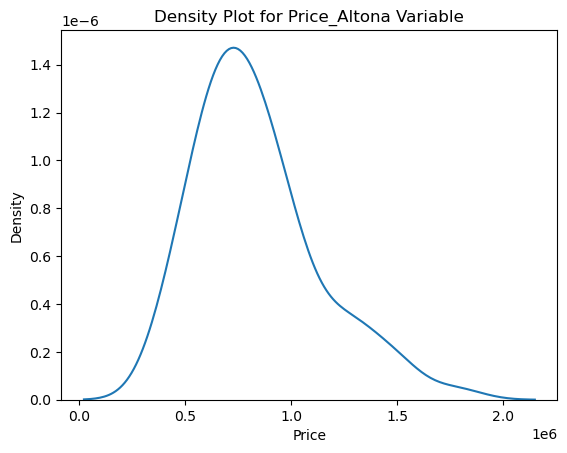

In [179]:
# Understanding skewness of the variable-
print('Skewness_of_Price_Variable:', df_1['Price'].skew().round(2))

sns.kdeplot(data=df_1, x=df_1['Price'])
plt.title('Density Plot for Price_Altona Variable')
plt.show()

In [181]:
# Calculate sample statistics
sample_mean = np.mean(property_prices)
sample_std = np.std(property_prices, ddof=1)  # use ddof=1 for sample standard deviation
sample_size = len(property_prices)

In [183]:
# Set the null hypothesis value
null_hypothesis_value = 800000

In [197]:
# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(property_prices, null_hypothesis_value)

# Since this is a one-tailed test for checking if the property price has increased, we divide the p-value by 2
p_value_one_tailed = p_value / 2

In [187]:
# Set the significance level
alpha = 0.05

In [195]:
# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value (one-tailed): {p_value_one_tailed:.5f}")

Sample Mean: 834830.41
T-Statistic: 1.0277
P-Value (one-tailed): 0.15374


In [191]:
# Making a decision
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: The typical property price is greater than $800,000.")
else:
    print("Fail to reject the null hypothesis: No sufficient evidence that the typical property price is greater than $800,000.")

Fail to reject the null hypothesis: No sufficient evidence that the typical property price is greater than $800,000.


# <font color=yellow> Hypothesis Question 2.
- For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

In [236]:
# Before calculating hypothesis for this question we need to fix our datetime formate datatype
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df[['Month', 'Year']].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Month,Year,Count
0,7,2017,1536
1,5,2017,1130
2,11,2016,1114
3,6,2017,1098
4,9,2016,925
5,9,2017,920
6,5,2016,899
7,8,2017,834
8,6,2016,732
9,8,2016,716


In [258]:
n_of_months=df.loc[(df['Year']== 2016) & (df['Month']>3) & (df['Month']<10)]
n_of_months['Month'].unique()

array([6, 5, 8, 7, 9, 4])

In [262]:
n1_of_months=df.loc[(df['Year']== 2016) & (df['Month']>9)]
n1_of_months['Month'].unique()

n2_of_months=df.loc[(df['Year']== 2016) & (df['Month']<4)]
n2_of_months['Month'].unique()

final_months=pd.concat([n1_of_months,n2_of_months],axis=0)
final_months['Year'].unique()
final_months['Month'].unique()

array([12, 10, 11,  2,  1])

In [264]:
summer_prices=n_of_months['Price']
summer_prices

winter_prices=final_months['Price']
winter_prices

0       1480000.0
7       1636000.0
8        300000.0
9       1097000.0
10       700000.0
          ...    
6634     890000.0
6888     645000.0
7168     250000.0
7224    1415000.0
7282     765000.0
Name: Price, Length: 2300, dtype: float64

In [266]:
# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(summer_prices, winter_prices)

In [268]:
# Set significance level
alpha = 0.05

In [276]:
#Compairing means of summer and winter prices-
print('Mean of the Summer Prices is:',summer_prices.mean().round(2))
print('Mean of the Winter Prices is:',winter_prices.mean().round(2))

#Compairing variance of summer and winter prices-
print('Variance of the Summer Prices is:',summer_prices.var())
print('Variance of the Winter Prices is:',winter_prices.var())

Mean of the Summer Prices is: 1021100.69
Mean of the Winter Prices is: 1071560.47
Variance of the Summer Prices is: 281920044356.0879
Variance of the Winter Prices is: 296755282076.8028


- There is significant difference with summer_prices and winter_prices

In [280]:
# Print the accurate results
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.7f}")

T-Statistic: -3.60
P-Value: 0.0003166


In [284]:
# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.")
else:
    print("Fail to reject the null hypothesis: No significant difference in property prices between summer and winter months.")

Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.


# <font color=yellow> Hypothesis Question 3.
- For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places.

In [294]:
# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

In [296]:
# Calculate the probability of a property not having car parking
p_no_parking = (abbotsford_data['Car'].value_counts().get('No', 0)) / len(abbotsford_data)

In [327]:
# Setting parameters for the binomial distribution
n = 10  # total properties sold
k = 3   # properties without car parking
p_no_car = 0.3  # probability of a property not having car parking

In [329]:
# Calculate the probability using binomial distribution
probability = binom.pmf(k, n, p_no_parking, p_no_car)

In [337]:
# Round off the answer to 3 decimal places
rounded_probability = round(probability, 3)
print(f"The probability that out of 10 properties sold, exactly 3 will not have car parking is: {rounded_probability}")

The probability that out of 10 properties sold, exactly 3 will not have car parking is: 0.0


In [335]:
# Calculate the binomial probability P(X = k)
binom_prob = binom.pmf(k, n, p_no_car)
# Print the result
print(f"Probability that exactly 3 out of 10 properties will not have car parking in Percentage= {(binom_prob*100).round(3)}")

Probability that exactly 3 out of 10 properties will not have car parking in Percentage= 26.683


# <font color=yellow> Hypothesis Question 4.
- In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places.

<Axes: xlabel='Rooms', ylabel='Density'>

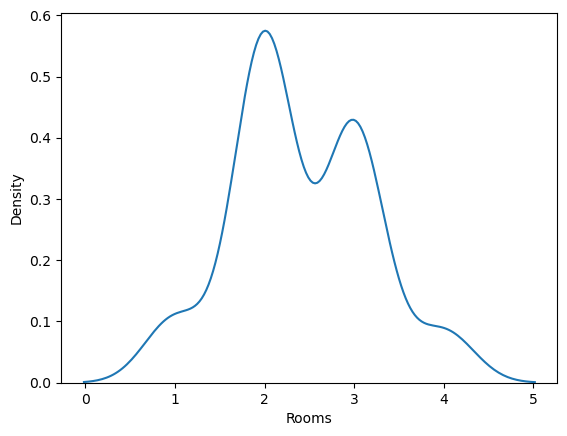

In [346]:
## Distribution of rooms
abbotsford_data['Rooms']
sns.kdeplot(data=abbotsford_data, x=abbotsford_data['Rooms'])

((array([-2.24758475, -1.88300147, -1.66866807, -1.51148003, -1.3846837 ,
         -1.27691511, -1.18222804, -1.09709871, -1.0192564 , -0.94714623,
         -0.87965307, -0.81594727, -0.75539284, -0.6974898 , -0.64183653,
         -0.58810422, -0.53601909, -0.48534961, -0.43589711, -0.38748877,
         -0.33997228, -0.2932116 , -0.24708372, -0.20147594, -0.15628363,
         -0.11140844, -0.06675659, -0.02223751,  0.02223751,  0.06675659,
          0.11140844,  0.15628363,  0.20147594,  0.24708372,  0.2932116 ,
          0.33997228,  0.38748877,  0.43589711,  0.48534961,  0.53601909,
          0.58810422,  0.64183653,  0.6974898 ,  0.75539284,  0.81594727,
          0.87965307,  0.94714623,  1.0192564 ,  1.09709871,  1.18222804,
          1.27691511,  1.3846837 ,  1.51148003,  1.66866807,  1.88300147,
          2.24758475]),
  array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        

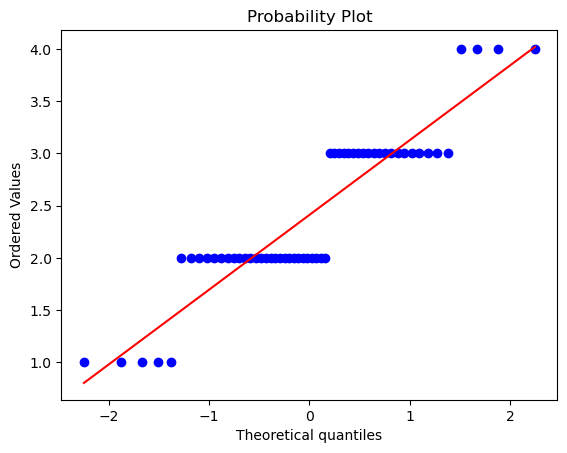

In [419]:
## Q.Q plot for normal distribution of rooms variable
stats.probplot(abbotsford_data['Rooms'], dist='norm', plot=plt)

In [357]:
# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

In [359]:
# Count total properties and properties with 3 rooms
total_properties = len(abbotsford_data)
properties_with_3_rooms = (abbotsford_data['Rooms'] == 3).sum()

In [369]:
total_properties

56

In [371]:
properties_with_3_rooms

20

In [379]:
# Calculate probability
if total_properties > 0:
    probability = properties_with_3_rooms / total_properties
else:
    probability = 0  # Handle case where there are no properties

In [417]:
# Round off the answer to 3 decimal places
rounded_probability = round(probability, 3)

# Print the results
print(f"The probability of finding a property with 3 rooms in Abbotsford is: {rounded_probability}")

The probability of finding a property with 3 rooms in Abbotsford is: 0.339


- Counting: It counts the total number of properties and those with exactly 3 rooms.
- Probability Calculation: The probability is calculated as the ratio of properties with 3 rooms to the total number of properties.

# <font color=yellow> Hypothesis Question 5.
- In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places.

<Axes: xlabel='Bathroom', ylabel='Density'>

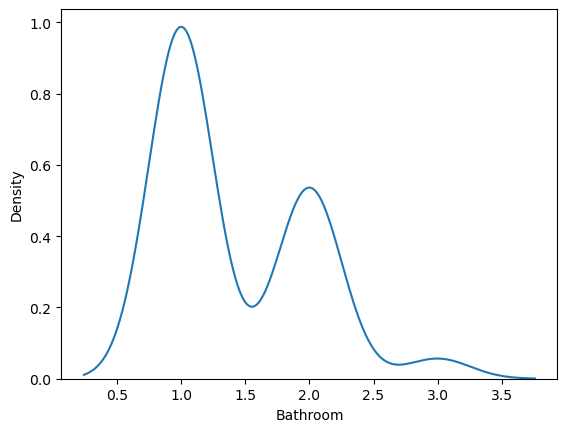

In [421]:
# Checking the distribution of Bathroom variable
abbotsford_data['Bathroom']
sns.kdeplot(data=abbotsford_data, x=abbotsford_data['Bathroom'])

In [390]:
# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

In [396]:
# Count total properties and properties with 2 bathrooms
total_properties = len(abbotsford_data)
properties_with_2_bathrooms = (abbotsford_data['Bathroom'] == 2).sum()

In [398]:
#Calculate probability
if total_properties > 0:
    probability = properties_with_2_bathrooms / total_properties
else:
    probability = 0  # Handle case where there are no properties

In [411]:
#  Round off the answer to 4 decimal places
rounded_probability = round(probability, 4)

In [413]:
# Print the result
print(f"The probability of finding a property with 2 bathrooms in Abbotsford is: {rounded_probability}")

The probability of finding a property with 2 bathrooms in Abbotsford is: 0.3393


In [431]:
# Calculated mean and var for thr bathrooms variable to calculate probability and z_score for the value 2
mean_bathrooms = abbotsford_data['Bathroom'].mean()
var_bathrooms  = abbotsford_data['Bathroom'].var()

print("\nMean of the bathrooms variables: ", mean_bathrooms)
print("\nVariance of the bathrooms variables: ", var_bathrooms)


Mean of the bathrooms variables:  1.4107142857142858

Variance of the bathrooms variables:  0.31915584415584425


In [435]:
# Calculating z_score for the value 2 and Probability of scoring above 2
z = (2-mean_bathrooms)/var_bathrooms
print(f'zscore for the value 2: {z:.2f}')

probability=1-stats.norm.cdf(z)
print(f'Probability of scoring above 2 is {probability*100:.2f}%')

zscore for the value 2: 1.85
Probability of scoring above 2 is 3.24%


### Interpretations :
> The calculated probability gives a quantitative measure of how prevalent properties with 2 bathrooms are in Abbotsford. It allows stakeholders in the real estate market to make informed decisions based on the availability of specific property features.

### Note: 
- Q.Q plot is visualizing the normal distribution for a specific varibles.
- Kde plot : Where we can check the skewness of the data and checking how it is spread out from a certain range.
- Box Plot : Where we can see the outliers of the specific variables. 